# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 215 (delta 102), reused 168 (delta 55), pack-reused 0
Receiving objects: 100% (215/215), 35.23 MiB | 16.34 MiB/s, done.
Resolving deltas: 100% (102/102), done.
Checking out files: 100% (49/49), done.
/content/machine_learning_1/perceptron_algorithm


In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [3]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

In [4]:
weights = [1.0 for i in range(len(features[0]))]

In [5]:
print("f:",features)

print("w",weights)

f: [[1 0]
 [0 2]
 [1 1]
 [1 2]
 [1 3]
 [2 2]
 [2 3]
 [3 2]]
w [1.0, 1.0]


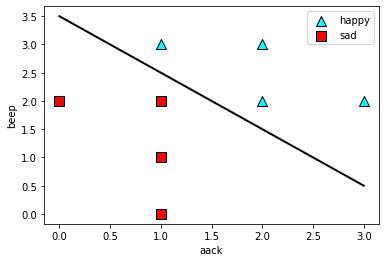

In [6]:
# Plotting the points
utils.plot_points(features, labels)

#the following line to see a good line fit for this data.
utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [7]:
#wieghts, x and fatures consist of two values
def step(x):

    '''implement step function'''

    if x>0:
      return 1
    if x<0:
      return 0

def score(weights, bias, features):
  
    '''implement score calculation'''

    output=weights@features+bias
    return output

def prediction(weights, bias, features):

    '''implement prediction calculation using step and score functions'''
  
    return step(score(weights, bias, features))

def error(weights, bias, features, label):

    '''implement error calculation using prediction and score functions'''
    Error= label- prediction(weights, bias, features) 
    if Error==0:
      return 0
    else :
      return abs(score(weights, bias, features))


def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [8]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):

    # update the weights and bias using a single data sample
    Predicted=prediction(weights, bias, features)
    weights[0]=weights[0]+learning_rate*(label-Predicted)*features[0]
    weights[1]=weights[1]+learning_rate*(label-Predicted)*features[1]
    bias=bias+learning_rate*(label-Predicted)

    return weights, bias

### Running the perceptron algorithm

In [9]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
  #here it takes a random
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        # Comment the following line to draw only the final classifier
        utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

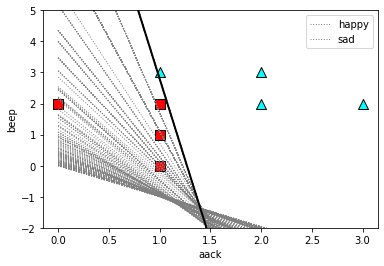

([0.5199999999999996, 0.049999999999999364], -0.6600000000000004)

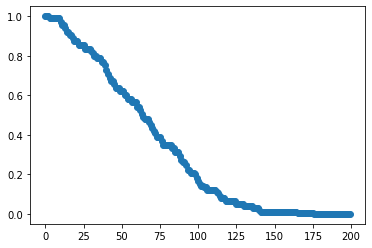

In [10]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using SKlearn

In [11]:
from sklearn.linear_model import Perceptron

#to train perceptron algorithm
clf= Perceptron(random_state=0)
clf.fit(features, labels)


Perceptron()

In [12]:
clf.score(features, labels)

1.0

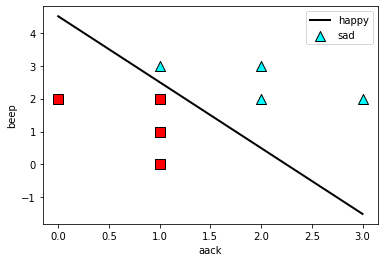

In [13]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()